![logo](1_bDwEvCRgrKVbLrAXEixpfA.png)
___

##### import libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
#from scipy import stats
%matplotlib inline 
sns.set(color_codes=True)

import functools as ft

#bag of words model
from sklearn.feature_extraction.text import CountVectorizer

#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

#visualizations
#!pip install wordcloud
from wordcloud import WordCloud
from pylab import *

# Step 4 - N-Grams
    a) Importing data
    
    b) N-Grams
        i) Unigram
       ii) Bigram
      iii) Trigram
    
    c) Corpus Visualizations

### a) Importing data

In [2]:
#import cleaned2_data.csv file
cleaned2_df = pd.read_csv("cleaned2_data.csv")

cleaned2_df.drop(['Unnamed: 0'], axis=1, inplace=True)

print(cleaned2_df.shape)

(77926, 22)


In [3]:
#import corpus_data.csv file
corpus_df = pd.read_csv("corpus_data.csv")

corpus_df.drop(['Unnamed: 0'], axis=1, inplace=True)

print(corpus_df.shape)
corpus_df.head()

(77926, 1)


,blurb
0,educating community self sufficiency building ...
1,thema literary society proposes publish one th...
2,collection hand lettered thing say idea sentim...
3,genesis follows mother son live together forei...
4,help u bring art culture ballet community cent...


##### Check for NaN Values in corpus_df

In [4]:
is_NaN = corpus_df.isna()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = corpus_df[row_has_NaN]
print(rows_with_NaN)

      blurb
9760    NaN
24673   NaN
30475   NaN
47239   NaN
48908   NaN
53464   NaN
60377   NaN
60884   NaN
61051   NaN
61985   NaN


In [5]:
corpus_df = corpus_df.dropna()
print(corpus_df.isna().sum())

blurb    0
dtype: int64


### b) N-Grams

##### i) Unigrams

In [6]:
#entire corpus series into seperate strings
corpus_series = corpus_df['blurb'].apply(lambda x: str(x))
print(type(corpus_series[0]))

print(len(corpus_series))
corpus_series

<class 'str'>
77916


0        educating community self sufficiency building ...
1        thema literary society proposes publish one th...
2        collection hand lettered thing say idea sentim...
3        genesis follows mother son live together forei...
4        help u bring art culture ballet community cent...
                               ...                        
77921    torrefy need help printing first run new album...
77922    god blessed downloads first single alive need ...
77923    raising money make debut self released studio ...
77924    starting hot sauce company ground using native...
77925    electric mobile farm stand transporting vegeta...
Name: blurb, Length: 77916, dtype: object

In [7]:
#getting unigrams  
vectorizer = CountVectorizer() 
X1 = vectorizer.fit_transform(corpus_series)  
features = (vectorizer.get_feature_names()) 

#applying TFIDF for unigrams
vectorizer = TfidfVectorizer() 
X2 = vectorizer.fit_transform(corpus_series) 
scores = (X2.toarray()) 

#getting top-ranking features 
sums = X2.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(features): 
    data1.append( (term, sums[0, col] )) 
uni_ranking = pd.DataFrame(data1, columns = ['term', 'rank']) 
uni_words = (uni_ranking.sort_values('rank', ascending = False)) 
print ("\n\nWords : \n", uni_words.head(20)) 

MemoryError: 

##### ii) Bigrams

In [12]:
#getting bigrams  
vectorizer = CountVectorizer(ngram_range =(2, 2)) 
X1 = vectorizer.fit_transform(corpus_series)  
features = (vectorizer.get_feature_names()) 

#applying TFIDF for bigrams
vectorizer = TfidfVectorizer(ngram_range =(2, 2)) 
X2 = vectorizer.fit_transform(corpus_series) 
scores = (X2.toarray()) 

#getting top-ranking features 
sums = X2.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(features): 
    data1.append( (term, sums[0, col] )) 
bi_ranking = pd.DataFrame(data1, columns = ['term', 'rank']) 
bi_words = (bi_ranking.sort_values('rank', ascending = False)) 
print ("\n\nWords : \n", bi_words.head(20)) 

MemoryError: 

##### iii) Trigrams

In [9]:
#getting trigrams  
vectorizer = CountVectorizer(ngram_range = (3,3)) 
X1 = vectorizer.fit_transform(corpus_series)  
features = (vectorizer.get_feature_names())  

#applying TFIDF 
vectorizer = TfidfVectorizer(ngram_range = (3,3)) 
X2 = vectorizer.fit_transform(corpus_series) 
scores = (X2.toarray())  
  
#getting top ranking features 
sums = X2.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(features): 
    data1.append( (term, sums[0,col] )) 
tri_ranking = pd.DataFrame(data1, columns = ['term','rank']) 
tri_words = (tri_ranking.sort_values('rank', ascending = False)) 
print ("\n\nWords head : \n", tri_words.head(20)) 

MemoryError: 

### c) Corpus Visualizations

In [8]:
print(corpus_df.head())
corpus_all = ' '.join(corpus_df['blurb'])

                                               blurb
0  educating community self sufficiency building ...
1  thema literary society proposes publish one th...
2  collection hand lettered thing say idea sentim...
3  genesis follows mother son live together forei...
4  help u bring art culture ballet community cent...


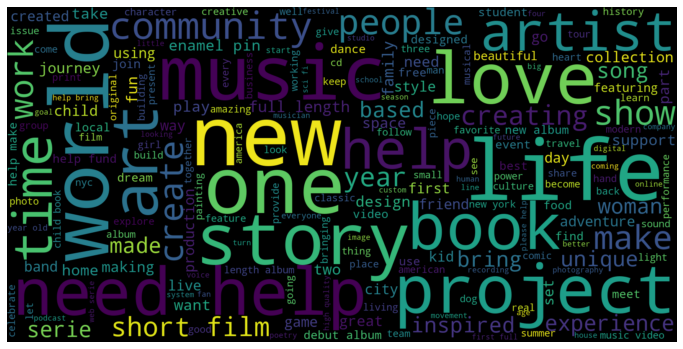

In [9]:
wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(corpus_all)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [12]:
y_pos = np.arange(300)
plt.figure(figsize=(15,8))
s = 1
expected_zipf = [uni_ranking.sort_values(by='rank', ascending=False)['rank']/(i+1)**s for i in y_pos]
plt.bar(y_pos, uni_ranking.sort_values(by='rank', ascending=False)['rank'][:300], align='center', alpha=0.5)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 300 words')

NameError: name 'uni_ranking' is not defined

<Figure size 1080x576 with 0 Axes>

### End of Step 4